# animation

This is a test notebook to help get visualization working.



In [1]:
# mini-source control: Last copied 29-SEP-2020: to tilt*, chlorophyll*, rca*, argo*
#                      last revised 09-OCT-2020
import os, sys, time, glob

from IPython.display import clear_output             # use inside loop with clear_output(wait = True) followed by print(i)
import warnings                                      # use with warnings.filterwarnings('ignore') or 'once'

home_dir = os.getenv("HOME")
this_dir = home_dir + '/chlorophyll/'
data_dir = '/data/'
data1_dir = '/data1'

from matplotlib import pyplot as plt
from matplotlib import colors as mplcolors
import numpy as np, pandas as pd, xarray as xr
from numpy import datetime64 as dt64, timedelta64 as td64

def doy(theDatetime): return 1 + int((theDatetime - dt64(str(theDatetime)[0:4] + '-01-01')) / td64(1, 'D')) # 1, 2, .... , 365, [366]
def dt64_from_doy(year, doy): return dt64(str(year) + '-01-01') + td64(doy-1, 'D')
def day_of_month_to_string(d): return str(d) if d > 9 else '0' + str(d)

print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))


Jupyter Notebook running Python 3


In [2]:
%matplotlib inline

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

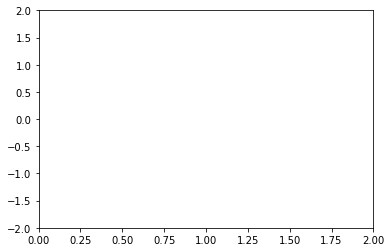

In [4]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [5]:
def init():
    line.set_data([], [])
    return (line,)

In [6]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [7]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [8]:
HTML(anim.to_html5_video())

MovieWriter stderr:
Error: unable to open display 
/tmp/tmpxktd14tl/temp.m4v: No such file or directory



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '50.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpxktd14tl/temp.m4v']' returned non-zero exit status 1.